In [2]:
#Importa os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('dark_background')

#### Importação e tratamento dos microdados

#### Dicionário de Variáveis utilizadas
|Chave|Descrição|Função|
|-----|-----|-----|
|**Identificação**|
|Ano| Ano de referência|Controle|
|Trimestre| Trimestre de referência|Controle|
|UF| Estado|Controle|
|Capital| Capital da UF|Controle|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|Controle|
|V1008| Número do Domicílio|Controle|
|V1014| Painel - Grupo de Controle|Controle|
|V1016| Número de entrevista (1 a 5)|Controle|
|V2003| Número de ordem|Controle|
|**Características**|
|V2007| Sexo|Característica|
|V2008| Dia Nascimento|Característica|
|V20081| Mês nascimento|Característica|
|V20082| Ano nascimento|Característica|
|V2010| Raça|Característica|
|**Variáveis exploradas**|
| VD4001 | Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4002 | Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4003 | Força de trabalho potencial para pessoas de 14 anos ou mais de idade | Descrição |
| VD4004A | Subocupação por insuficiência de horas efetivamente trabalhadas em todos os trabalhos | Descrição |
| VD4005 | Pessoas desalentadas na semana de referência | Descrição |
|**Auxiliares**|
|V1028| Peso do domicílio e das pessoas sem calibração|Expansão|
|V1029| Peso do domicílio e das pessoas com calibração|Expansão|
|V1033| Projeção da população por sexo e idade|Expansão|
|posest|Domínios de projeção geográficos|Expansão|

 Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

 **PARA ESTIMAÇÃO DA POPULAÇÃO, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.**



Importação dos microdados

In [3]:
#determina qual diretório usar para cada sistema operacional.
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\feather\\'

else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/feather/'

#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente.

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle e chave ID
                        'VD4001', #Variáveis de interesse
                        'V1027', 'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #expansão
                    
for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
                print(f'lendo PNAD{ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if 2019 < ano < 2022:
                print(f'lendo PNAD{ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if ano == 2022 and tri < 3:
            print(f'lendo PNAD{ano} {tri}')
            globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)


lendo PNAD2019 4
lendo PNAD2020 1
lendo PNAD2020 2
lendo PNAD2020 3
lendo PNAD2020 4
lendo PNAD2021 1
lendo PNAD2021 2
lendo PNAD2021 3
lendo PNAD2021 4
lendo PNAD2022 1
lendo PNAD2022 2


In [4]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.

pnadc_completa = pd.concat([pnad_2019_4, 
                            pnad_2020_1, 
                            pnad_2020_2, 
                            pnad_2020_3, 
                            pnad_2020_4, 
                            pnad_2021_1, 
                            pnad_2021_2, 
                            pnad_2021_3, 
                            pnad_2021_4, 
                            pnad_2022_1, 
                            pnad_2022_2])
                            
#Converte variável para criar ID
pnadc_completa['V2007'] = np.where(pnadc_completa['V2007'] == 'Homem', 0, 1)
#Converte variáveis para numéricas
pnadc_completa['UPA'] = pd.to_numeric(pnadc_completa['UPA'] , errors='coerce') 
pnadc_completa['V1008'] = pd.to_numeric(pnadc_completa['V1008'] , errors='coerce') 
pnadc_completa['V1014'] = pd.to_numeric(pnadc_completa['V1014'] , errors='coerce') 
pnadc_completa['V2007'] = pd.to_numeric(pnadc_completa['V2007'] , errors='coerce') 
pnadc_completa['V2008'] = pd.to_numeric(pnadc_completa['V2008'] , errors='coerce') 
pnadc_completa['V20081'] = pd.to_numeric(pnadc_completa['V20081'] , errors='coerce') 
pnadc_completa['V20082'] = pd.to_numeric(pnadc_completa['V20082'] , errors='coerce') 

In [5]:

#Cria chave ID e novo df
pnadc_completa = pd.DataFrame({
    #Controle
    'Ano':pnadc_completa['Ano'], 
    'Trimestre':pnadc_completa['Trimestre'],
    'UPA':pnadc_completa['UPA'],
    'UF':pnadc_completa['UF'],
    'V2007':pnadc_completa['V2007'],
    #ID  
    'ID': pnadc_completa['UPA'] + 
        pnadc_completa['V1008'] + 
        pnadc_completa['V1014'] + 
        pnadc_completa['V2007'] +
        pnadc_completa['V2008'] +
        pnadc_completa['V20081'] +
        pnadc_completa['V20082'],
    #Exploradas
    'VD4001': pnadc_completa['VD4001'],
    #Expansão
    'V1027': pnadc_completa['V1027'],
    'V1028': pnadc_completa['V1028'],
    'V1029': pnadc_completa['V1029'],
    'V1033': pnadc_completa['V1033'],
    'posest': pnadc_completa['posest'],
    'posest_sxi': pnadc_completa['posest_sxi']
    })

#Reverte alteração da coluna V2007 para os rótulos anteiores
pnadc_completa['V2007'] = pnadc_completa['V2007'].apply(lambda x: 'Homem' if x == 0 else 'Mulher')


In [6]:
# Ordernação da série histórica por ano e trimestre.
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)
#concatena a coluna 'Ano' e 'Trimestre' em uma única coluna.
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)
#Conversão da coluna ano_tri para datetime.
pnadc_completa['ano_tri'] = pd.to_datetime(pnadc_completa['ano_tri']).dt.to_period('Q')

In [34]:
condicao_forca_trab = pd.crosstab(
                        index=pnadc_completa['ano_tri'],
                        columns=pnadc_completa['VD4001'],
                        values=pnadc_completa['V1028'], aggfunc='sum') / 1000

In [35]:
condicao_forca_trab.transpose()

ano_tri,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2
VD4001,,,,,,,,,,,
Pessoas fora da força de trabalho,61579.114208,63164.105671,72572.974749,72233.570501,69041.594939,68745.610836,67269.525552,65456.153739,64525.083239,65453.786571,64718.731771
Pessoas na força de trabalho,107417.659793,106262.512332,97279.312253,98036.923513,101636.886122,102338.858313,104215.850702,106429.835435,107758.093762,107224.303429,108349.086280


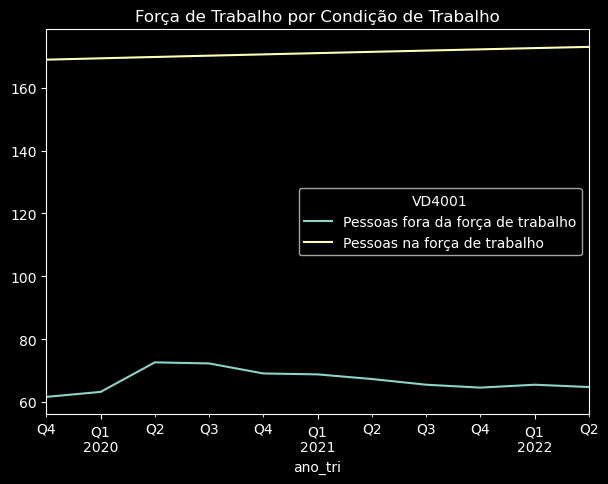

In [24]:
condicao_forca_trab.plot(stacked=True, figsize=(7, 5), title='Força de Trabalho por Condição de Trabalho')
plt.show()